In [2]:
import pandas as pd

# File path
mf_loan_path = "/MF Bank loan Dataset.xlsx"

# Load the datasets
mf_loan_df = pd.read_excel(mf_loan_path)  # Microfinance loan dataset

# Display basic info on datasets
mf_loan_info = mf_loan_df.info()

# Display the first few rows of each dataset
mf_loan_head = mf_loan_df.head()

mf_loan_info, mf_loan_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Loan_ID              501 non-null    object        
 1   Mode of application  498 non-null    object        
 2   loan_status          501 non-null    object        
 3   Principal            501 non-null    int64         
 4   terms                501 non-null    int64         
 5   effective_date       501 non-null    datetime64[ns]
 6   due_date             501 non-null    datetime64[ns]
 7   paid_off_time        401 non-null    datetime64[ns]
 8   past_due_days        200 non-null    float64       
 9   age                  501 non-null    int64         
 10  Highest Education    501 non-null    object        
 11  Gender               501 non-null    object        
 12  Guarantor            486 non-null    object        
dtypes: datetime64[ns](3), float64(1), i

(None,
      Loan_ID Mode of application loan_status  Principal  terms effective_date  \
 0  c20160301              Online  COLLECTION       1000     15     2016-09-09   
 1  c20160302              Branch  COLLECTION       1000     30     2016-09-09   
 2  c20160303              Online  COLLECTION       1000     30     2016-09-09   
 3  c20160304              Online  COLLECTION        800     15     2016-09-09   
 4  c20160305              Online  COLLECTION        800     15     2016-09-09   
 
     due_date paid_off_time  past_due_days  age     Highest Education Gender  \
 0 2016-09-23           NaT           76.0   29               college   male   
 1 2016-10-08           NaT           61.0   37  High School or Below   male   
 2 2016-10-08           NaT           61.0   33  High School or Below   male   
 3 2016-09-23           NaT           76.0   27               college   male   
 4 2016-09-23           NaT           76.0   24       Bachelor Degree   male   
 
   Guarantor  
 0

In [3]:
# Data Preprocessing: Cleaning the Microfinance Loan Dataset
# Drop irrelevant columns (keeping necessary financial & demographic data)
mf_loan_cleaned = mf_loan_df[["Principal", "terms", "loan_status", "age", "Highest Education", "Gender", "Guarantor"]]

# Convert categorical variables to numeric
mf_loan_cleaned["loan_status"] = mf_loan_cleaned["loan_status"].map({"PAIDOFF": 1, "COLLECTION": 0})
mf_loan_cleaned["Gender"] = mf_loan_cleaned["Gender"].map({"male": 1, "female": 0})
mf_loan_cleaned["Guarantor"] = mf_loan_cleaned["Guarantor"].map({"Yes": 1, "No": 0})

# Encode education levels numerically
education_levels = {
    "High School or Below": 0,
    "college": 1,
    "Bachelor Degree": 2,
    "Master or Above": 3
}
mf_loan_cleaned["Highest Education"] = mf_loan_cleaned["Highest Education"].map(education_levels)

# Drop any remaining missing values
mf_loan_cleaned = mf_loan_cleaned.dropna()

mf_loan_cleaned.head()

<ipython-input-3-c87d6bbaaaef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_loan_cleaned["loan_status"] = mf_loan_cleaned["loan_status"].map({"PAIDOFF": 1, "COLLECTION": 0})
<ipython-input-3-c87d6bbaaaef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_loan_cleaned["Gender"] = mf_loan_cleaned["Gender"].map({"male": 1, "female": 0})
<ipython-input-3-c87d6bbaaaef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Principal,terms,loan_status,age,Highest Education,Gender,Guarantor
0,1000,15,0.0,29,1,1,1.0
1,1000,30,0.0,37,0,1,0.0
2,1000,30,0.0,33,0,1,0.0
3,800,15,0.0,27,1,1,0.0
4,800,15,0.0,24,2,1,0.0


In [4]:
# Train an AI Model for Loan Eligibility Prediction

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = mf_loan_cleaned.drop(columns=["loan_status"])
y = mf_loan_cleaned["loan_status"]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model (baseline)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display model performance
accuracy, classification_rep

(0.6794871794871795,
 '              precision    recall  f1-score   support\n\n         0.0       1.00      0.11      0.19        28\n         1.0       0.67      1.00      0.80        50\n\n    accuracy                           0.68        78\n   macro avg       0.83      0.55      0.50        78\nweighted avg       0.79      0.68      0.58        78\n')

In [6]:
# Optimize and Train XGBoost with Limited Boosting Rounds

from xgboost import XGBClassifier

# Train an optimized XGBoost classifier with limited boosting rounds
xgb_model_opt = XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric="logloss")
xgb_model_opt.fit(X_train_scaled, y_train)

# Predictions using optimized XGBoost model
y_pred_xgb_opt = xgb_model_opt.predict(X_test_scaled)

# Model evaluation
accuracy_xgb_opt = accuracy_score(y_test, y_pred_xgb_opt)
classification_rep_xgb_opt = classification_report(y_test, y_pred_xgb_opt)

# Display improved model performance
accuracy_xgb_opt, classification_rep_xgb_opt

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:46:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.6153846153846154,
 '              precision    recall  f1-score   support\n\n         0.0       0.40      0.14      0.21        28\n         1.0       0.65      0.88      0.75        50\n\n    accuracy                           0.62        78\n   macro avg       0.52      0.51      0.48        78\nweighted avg       0.56      0.62      0.55        78\n')

In [7]:
!pip install onnxmltools skl2onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires p

In [8]:
import xgboost as xgb
import onnxmltools
from skl2onnx.common.data_types import FloatTensorType

# Save XGBoost model in a format suitable for ONNX conversion
xgb_model_opt.get_booster().save_model("xgboost_microfinance.json")

# Convert XGBoost to ONNX
initial_type = [("float_input", FloatTensorType([None, X_train_scaled.shape[1]]))]
onnx_model = onnxmltools.convert_xgboost(xgb_model_opt, initial_types=initial_type)

# Save ONNX model
onnxmltools.utils.save_model(onnx_model, "xgboost_microfinance.onnx")
print("ONNX model saved successfully!")

ONNX model saved successfully!


In [9]:
import onnxruntime as ort
import numpy as np

# Load ONNX model
session = ort.InferenceSession("/content/xgboost_microfinance.onnx")

# Make predictions
input_name = session.get_inputs()[0].name
prediction = session.run(None, {input_name: X_test_scaled.astype(np.float32)})[0]

print("ONNX Predictions:", prediction)

ONNX Predictions: [1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1]


In [10]:
# Train Decision Tree & Random Forest for Loan Eligibility Prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

classification_rep_dt = classification_report(y_test, y_pred_dt)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display model comparison
accuracy_dt, classification_rep_dt, accuracy_rf, classification_rep_rf

(0.6025641025641025,
 '              precision    recall  f1-score   support\n\n         0.0       0.38      0.18      0.24        28\n         1.0       0.65      0.84      0.73        50\n\n    accuracy                           0.60        78\n   macro avg       0.52      0.51      0.49        78\nweighted avg       0.55      0.60      0.56        78\n',
 0.6153846153846154,
 '              precision    recall  f1-score   support\n\n         0.0       0.25      0.04      0.06        28\n         1.0       0.64      0.94      0.76        50\n\n    accuracy                           0.62        78\n   macro avg       0.44      0.49      0.41        78\nweighted avg       0.50      0.62      0.51        78\n')

NameError: name 'plt' is not defined

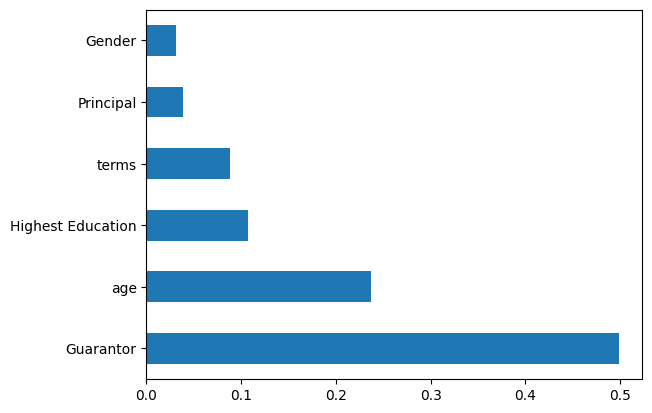

In [11]:
# Displays bar chart of feature importance to model predictions
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')  # Top 10 features
plt.show()

In [12]:
print(0.6025641025641025,
 '              precision    recall  f1-score   support\n\n         0.0       0.38      0.18      0.24        28\n         1.0       0.65      0.84      0.73        50\n\n    accuracy                           0.60        78\n   macro avg       0.52      0.51      0.49        78\nweighted avg       0.55      0.60      0.56        78\n',
 0.6153846153846154,
 '              precision    recall  f1-score   support\n\n         0.0       0.25      0.04      0.06        28\n         1.0       0.64      0.94      0.76        50\n\n    accuracy                           0.62        78\n   macro avg       0.44      0.49      0.41        78\nweighted avg       0.50      0.62      0.51        78\n')

0.6025641025641025               precision    recall  f1-score   support

         0.0       0.38      0.18      0.24        28
         1.0       0.65      0.84      0.73        50

    accuracy                           0.60        78
   macro avg       0.52      0.51      0.49        78
weighted avg       0.55      0.60      0.56        78
 0.6153846153846154               precision    recall  f1-score   support

         0.0       0.25      0.04      0.06        28
         1.0       0.64      0.94      0.76        50

    accuracy                           0.62        78
   macro avg       0.44      0.49      0.41        78
weighted avg       0.50      0.62      0.51        78



In [13]:
# Overpicking/Underpicking to remove random bias
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_resampled, y_resampled)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

classification_rep_dt = classification_report(y_test, y_pred_dt)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display model comparison
accuracy_dt, classification_rep_dt, accuracy_rf, classification_rep_rf

(0.6153846153846154,
 '              precision    recall  f1-score   support\n\n         0.0       0.48      0.79      0.59        28\n         1.0       0.81      0.52      0.63        50\n\n    accuracy                           0.62        78\n   macro avg       0.65      0.65      0.61        78\nweighted avg       0.69      0.62      0.62        78\n',
 0.7051282051282052,
 '              precision    recall  f1-score   support\n\n         0.0       0.56      0.79      0.66        28\n         1.0       0.85      0.66      0.74        50\n\n    accuracy                           0.71        78\n   macro avg       0.71      0.72      0.70        78\nweighted avg       0.74      0.71      0.71        78\n')

In [14]:
#Cross-Validating data to improve model accuracy using 5 K-folds
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # Store results
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Print average results
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1_scores):.4f}")


Mean Accuracy: 0.7411
Mean Precision: 0.7263
Mean Recall: 0.7411
Mean F1-score: 0.6814


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c